In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.datasets import load_boston

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [11]:
houses = load_boston()
housez = pd.DataFrame(data= np.c_[houses['data'], houses['target']], columns=np.append(houses['feature_names'], 'House Price'))
housez.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
price = pd.read_csv(r'prices.csv')
price_stock = price.loc[price['symbol'] == 'AMZN']
price_stock = price_stock.drop(['date','symbol','low','high','volume'], axis=1)
price_stock = price_stock.reset_index(drop=True)
price_stock.head()

,open,close
0,136.250000,133.899994
1,133.429993,134.690002
2,134.600006,132.250000
3,132.009995,130.000000
4,130.559998,133.520004


In [63]:
tree = DecisionTreeRegressor(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(price_stock.drop('open', axis=1), price_stock.loc[:, ['open']], shuffle=False, test_size=0.2, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [64]:
#y_train.head()
#y_test.head()
#X_train.head()
#X_test.head()

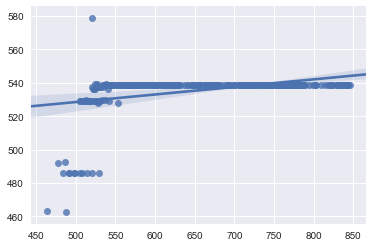

In [67]:
sns.regplot(y_test.values, y_pred, ci=99)

## The following is from
https://enlight.nyc/stock-market-prediction

In [2]:
import quandl

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.datasets import load_boston

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [231]:
#df = quandl.get("WIKI/BLK&api_key=<2b4r6b_sVfWNsZuUjMZX>")  #Stock ticker
price = pd.read_csv(r'prices.csv')  
df = price.loc[price['symbol'] == 'AMZN']    
forecast_out = int(7)   #Number of days to predict 
df = df.reset_index()
df = df[['close']]  #Drop uneeeded columns

#df['Prediction'] = df[['close']].shift(-forecast_out) #Create Target Column with shifted data
for i in range(10): 
    col_lab = 'T+'+str(i)
    df[col_lab] = df['close'].shift(i)
    

In [233]:
df.head()

,close,T+0,T+1,T+2,T+3,T+4,T+5,T+6,T+7,T+8,T+9
0,133.899994,133.899994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,134.690002,134.690002,133.899994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132.250000,132.250000,134.690002,133.899994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130.000000,130.000000,132.250000,134.690002,133.899994,NaN,NaN,NaN,NaN,NaN,NaN
4,133.520004,133.520004,130.000000,132.250000,134.690002,133.899994,NaN,NaN,NaN,NaN,NaN


In [234]:
df = df.drop(['close'], axis=1)

In [235]:
df2 = df.loc[df['T+9'].notnull()]

In [236]:
df2.head(8)

,T+0,T+1,T+2,T+3,T+4,T+5,T+6,T+7,T+8,T+9
9,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004,130.000000,132.250000,134.690002,133.899994
10,127.610001,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004,130.000000,132.250000,134.690002
11,125.779999,127.610001,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004,130.000000,132.250000
12,126.620003,125.779999,127.610001,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004,130.000000
13,121.430000,126.620003,125.779999,127.610001,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004
14,120.309998,121.430000,126.620003,125.779999,127.610001,127.139999,127.349998,129.110001,127.349998,130.309998
15,119.480003,120.309998,121.430000,126.620003,125.779999,127.610001,127.139999,127.349998,129.110001,127.349998
16,122.750000,119.480003,120.309998,121.430000,126.620003,125.779999,127.610001,127.139999,127.349998,129.110001


In [238]:

X_train, X_test, y_train, y_test = train_test_split(df2.drop('T+0', axis=1), df2.loc[:,['T+0']], shuffle=False, test_size=0.2, random_state=42)

# - Training -
tree = LinearRegression()
tree.fit(X_train,y_train)


# - Testing -
#confidence = clf.score(X_test, y_test)
#print("confidence: ", confidence)

#forecast_prediction = clf.predict(X_forecast)
y_pred = tree.predict(X_test)


#for i in range((df.shape[0]-(forecast_out)),df.shape[0]):
#    k = i - df.shape[0]
#    df['Prediction'][i] = forecast_prediction[k]
    #print(i, forecast_prediction[k])
    

In [239]:
y_pred.shape

(351, 1)

In [246]:
tree.coef_

array([[ 0.97487183, -0.02222423,  0.03966285, -0.00704404,  0.02852666,
         0.01421304,  0.00350622, -0.02374178, -0.00704536]])

In [241]:
y_pred = pd.DataFrame(y_pred)
y_test = y_test.reset_index()
y_test = y_test.drop(columns = ['index'])

In [242]:
X_train.shape

(1402, 9)

In [248]:
X_test = X_test.reset_index()
X_test = X_test.drop(columns = ['index'])

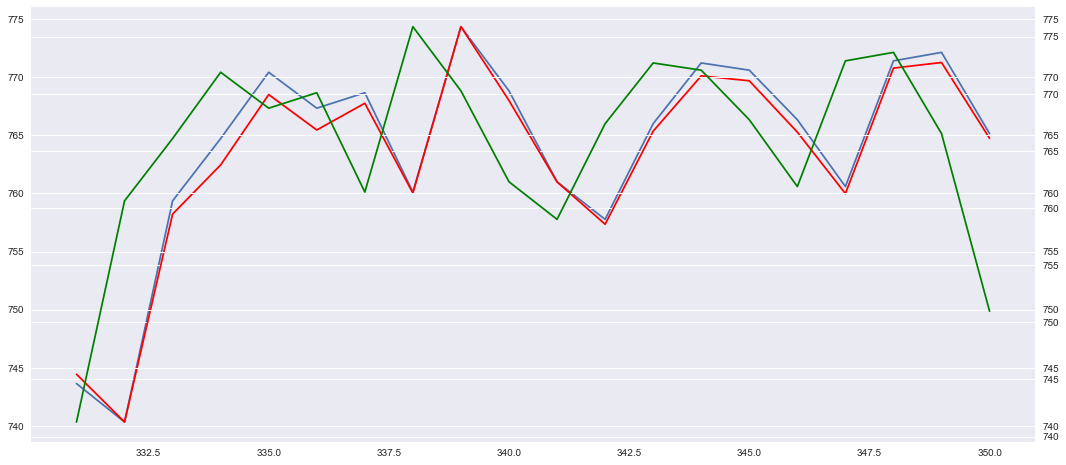

In [253]:
fig, ax1 = plt.subplots(figsize=(18,8))

ax1.plot(X_test['T+1'][-20:])
ax1.grid(False)
ax2=ax1.twinx()
ax3=ax1.twinx()

ax2.plot(y_pred[-20:], color='red')
ax3.plot(y_test[-20:], color='green')


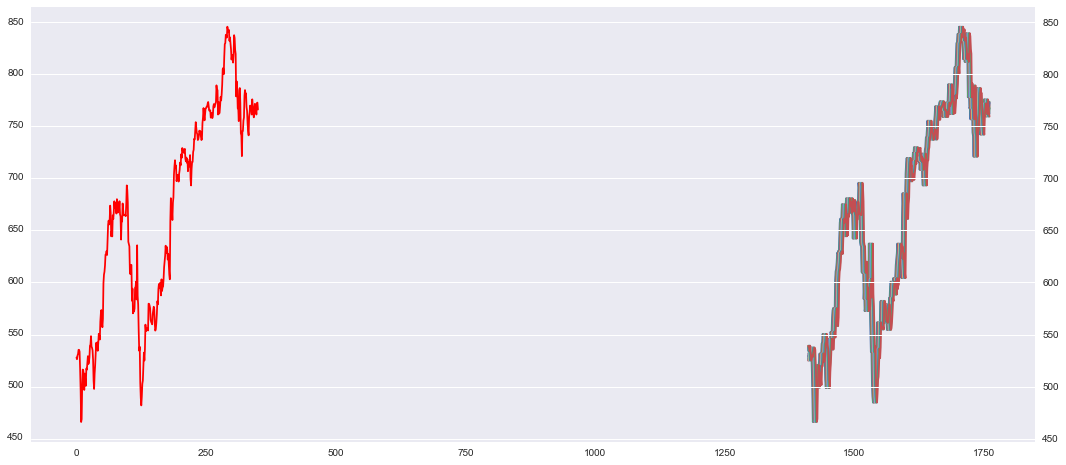

In [244]:
fig, ax1 = plt.subplots(figsize=(18,8))

ax1.plot(X_test)
ax1.grid(False)
ax2=ax1.twinx()
ax2.plot(y_pred, color='red')


In [169]:
X_test = X_test.reset_index()
X_test = X_test.drop(columns = ['index'])

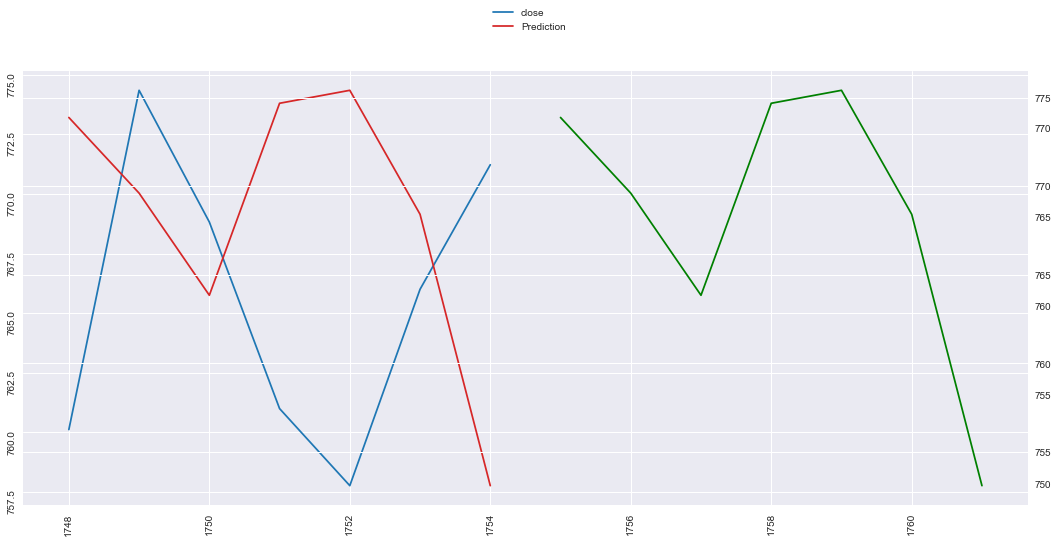

In [112]:
range_date = 1762

fig, ax1 = plt.subplots(figsize=(18,8))

ax1.plot(df['close'][(df.shape[0]-range_date):], color='tab:blue')
ax1.tick_params(labelrotation=90)

ax2 = ax1.twinx()
ax2.plot(df['Prediction'][(df.shape[0]-range_date):], color='tab:red')
ax2.grid(False)

ax3 = ax1.twinx()
ax3.plot(df_new, color='green')

fig.legend(loc=9)

In [89]:
df_new = pd.DataFrame(forecast_prediction)

In [92]:
df_new.index += (len(df)-len(forecast_prediction))

In [93]:
df_new

,0
1755,773.874393
1756,769.606004
1757,763.844613
1758,774.676026
1759,775.407453
1760,768.413644
1761,753.103343


In [79]:
df.tail()

,close,Prediction
1757,760.590027,NaN
1758,771.400024,NaN
1759,772.130005,NaN
1760,765.150024,NaN
1761,749.869995,NaN


In [53]:
df.tail()

,close,Prediction
1757,760.590027,NaN
1758,771.400024,NaN
1759,772.130005,NaN
1760,765.150024,NaN
1761,749.869995,NaN


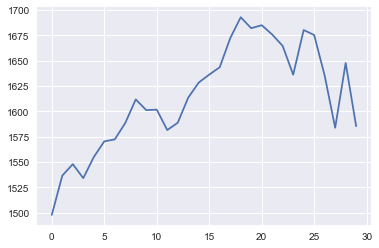

In [244]:
plt.plot(forecast_prediction)

In [168]:
forecast_prediction

array([1500.12410323])

In [ ]:
%reset

In [36]:
range(10)

TypeError: 'int' object is not callable

In [2]:
for i in range(0,3):
    print('dfgf')

dfgf
dfgf
dfgf
